In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Loading the Data(Fashion MNSIT)  from keras and preprocessing

In [16]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()

X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1)) / 255.0
X_test_full = X_test_full.reshape((X_test_full.shape[0], 28, 28, 1)) / 255.0

y_train_full = to_categorical(y_train_full, 10)
y_test_full = to_categorical(y_test_full, 10)


Making the Model using 3 Convulation Layers and Fully Connected Layer

In [39]:

model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


Added dropout in Fully connected layer due to overfitting on training data.

Optimizer and Loss Function

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Training the model

In [41]:
history = model.fit(X_train_full, y_train_full, epochs=30,  validation_data=(X_test_full, y_test_full))


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6986 - loss: 0.8295 - val_accuracy: 0.8234 - val_loss: 0.4726
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8459 - loss: 0.4213 - val_accuracy: 0.8519 - val_loss: 0.3953
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8730 - loss: 0.3433 - val_accuracy: 0.8670 - val_loss: 0.3603
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8894 - loss: 0.3019 - val_accuracy: 0.8757 - val_loss: 0.3424
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8984 - loss: 0.2740 - val_accuracy: 0.8830 - val_loss: 0.3226
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9065 - loss: 0.2496 - val_accuracy: 0.8893 - val_loss: 0.3014
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9111 - loss: 0.2349 - val_accuracy: 0.8902 - val_loss: 0.3196
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.218

Plot of Validation accuracy and Training Acurracy

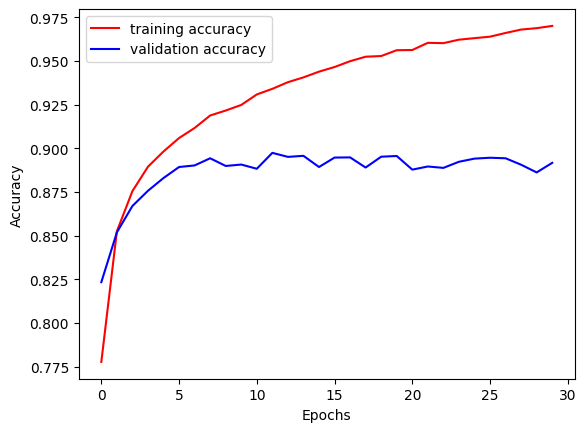

In [42]:
plt.plot(history.history['accuracy'], color = 'Red', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], color = 'Blue', label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
test_loss, test_accuracy = model.evaluate(X_test_full, y_test_full)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.5581
